# Python's doctest: Document and Test Your Code at Once

For reference, I have followed everything from [tutorial](https://realpython.com/python-doctest/).

--- 

`doctest` is another testing framework in Python, which is simpler and more lightweight compared to `unittest` and `pytest`. It is particularly useful for ensuring that the examples in your documentation stay accurate and continue to work as expected.

Apart from allowing you to use your code’s documentation for testing the code itself, doctest will help you keep your code and its documentation in perfect sync at any moment.

**Note:**
- Documentation strings, or simply docstrings, are a neat Python feature that can help you document your code as you go. The advantage of docstrings compared to comments is that the interpreter doesn’t ignore them. They’re a living part of your code.
- Because docstrings are active parts of your code, you can access them at runtime. To do this, you can use the .__doc__ special attributes on your packages, modules, classes, methods, and functions.
- Tools like `MkDocs` and `Sphinx` can take advantage of docstrings for generating project documentation automatically.
- You can add docstrings to your packages, modules, classes, methods, and functions in Python. 


---

### 1. What is `doctest`?

`doctest` is a module included in Python’s standard library that allows you to embed tests directly in your docstrings. When you run `doctest`, it extracts these tests, runs them, and checks whether the output matches the expected results as documented.

### 2. Why Use `doctest`?

- **Documentation**: `doctest` makes sure that your documentation is up-to-date and that the examples you provide actually work. This is especially useful for libraries and APIs, where users rely heavily on examples.
- **Simplicity**: Since tests are embedded in docstrings, there’s no need to write separate test cases or methods. The syntax is simple and straightforward.
- **Ease of Use**: `doctest` can be used alongside other testing frameworks like `unittest` or `pytest` without any issues.

**Comments/docstrings have a couple of drawbacks:**
- They’re ignored by the interpreter or compiler, which makes them unreachable at runtime.
- They often get outdated when the code evolves and the comments remain untouched.

### 3. How `doctest` Works

The doctest module is a lightweight testing framework that provides quick and straightforward test automation. It can read the test cases from your project’s documentation and your code’s docstrings. This framework is shipped with the Python interpreter and adheres to the batteries-included philosophy.

`doctest` parses the docstrings of your functions, methods, classes, and modules, looking for pieces of text that look like interactive Python sessions. It then executes these sessions and compares the results against the expected output.

You can use doctest from either your code or your command line. To find and run your test cases, doctest follows a few steps:

- Searches for text that looks like Python interactive sessions in your documentation and docstrings
- Parses those pieces of text to distinguish between executable code and expected results
- Runs the executable code like regular Python code
- Compares the execution result with the expected result

The doctest framework searches for test cases in your documentation and the docstrings of packages, modules, functions, classes, and methods. It doesn’t search for test cases in any objects that you import.

In general, doctest interprets as executable Python code all those lines of text that start with the primary (`>>>`) or secondary (`...`) REPL prompts. The lines immediately after either prompt are understood as the code’s expected output or result.

### 4. What doctest Is Useful For?

- Writing quick and effective test cases to check your code as you write it
- Running acceptance, regression, and integration test cases on your projects, packages, and modules
- Checking if your docstrings are up-to-date and in sync with the target code
- Verifying if your projects’ documentation is up-to-date
- Writing hands-on tutorials for your projects, packages, and modules
- Illustrating how to use your projects’ APIs and what the expected input and output must be

Having doctest tests in your documentation and docstrings is an excellent way for your clients or teammates to run those tests when evaluating the features, specifications, and quality of your code.

### 5. Writing Your Own doctest Tests in Python
Now that you know what doctest is and what you can use it for, you’ll learn how to use doctest to test your code. No particular setup is required because doctest is part of the Python standard library. You can use it in your Python code without installing any additional packages.

**General structure of the docstrings:**

---
```python 
"""This module implements functions to process iterables."""

def find_value(value, iterable):
    """Return True if value is in iterable, False otherwise."""
    # Be explicit by using iteration instead of membership
    for item in iterable:
        if value == item:  # Find the target value by equality
            return True
    return False
```
---

#### 6. Creating doctest Tests for Checking Returned and Printed Values

##### Usecase 1

The first and probably most common use case of code testing is checking the return value of functions, methods, and other callables. You can do this with doctest tests. For example, say you have a function called `add()` that takes two numbers as arguments and returns their arithmetic sum:

---
```python 
# calculations.py

def add(a, b):
    return float(a + b)
```
---

This function adds two numbers together. Documenting your code is a good practice, so you can add a docstring to this function. Your docstring can look something like this:

---
```python 
# calculations.py

def add(a, b):
    """Compute and return the sum of two numbers.

    Usage examples:
    >>> add(4.0, 2.0)
    6.0
    >>> add(4, 2)
    6.0
    """
    return float(a + b)
```
--- 

This docstring includes two examples of how to use `add()`. Each example consists of an initial line that starts with Python’s primary interactive prompt, `>>>`. This line includes a call to `add()` with two numeric arguments. Then the example has a second line that contains the expected output, which matches the function’s expected return value.

In both examples, the expected output is a floating-point number, which is required because the function always returns this type of number.

You can run these tests with doctest. Go ahead and run the following command:

---
```bash 
$ python -m doctest calculations.py
```
--- 

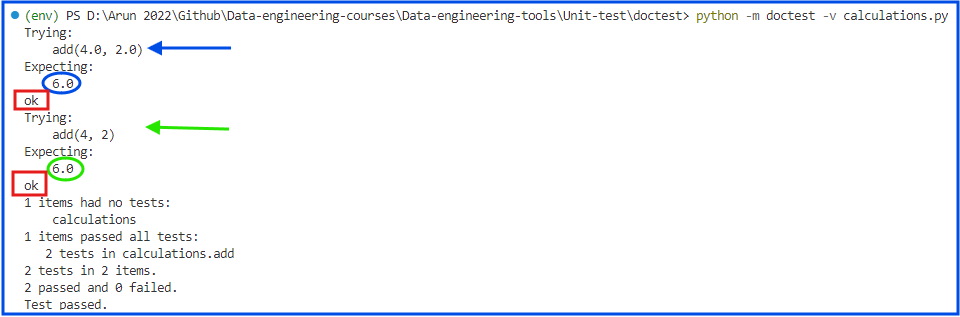

Running doctest with the `-v` option produces detailed output that describes the test-running process. The first two highlighted lines in blue and green color show the actual tests and their corresponding expected output. The line immediately after the expected output of each test displays the word ok (in red), meaning that the target test passed successfully. In this example, the two tests passed, as you can confirm in the last line.

##### Usecase 2 

Another common use case of doctest tests is to check the printed output of a given piece of code. Checkout the `printed_output.py` python file in `doctest/` folder and then compile it using: 

```bash 
$ python -m doctest -v printed_output.py
```

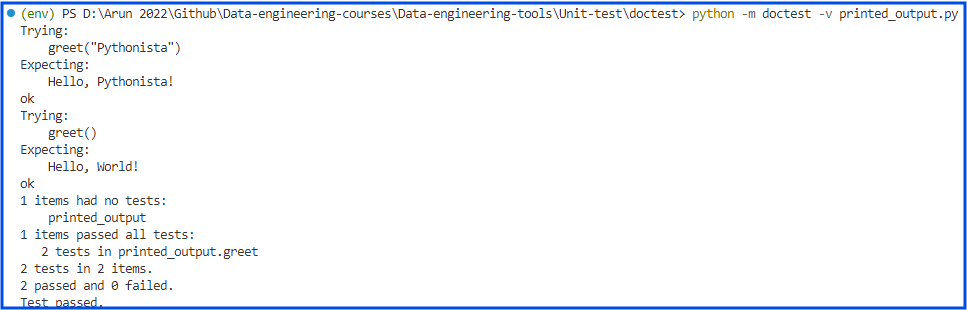 

These tests work as expected because the Python REPL displays returned and printed values on the screen. This behavior allows doctest to match both returned and printed values in your test cases.

Testing what a function prints on the screen is pretty straightforward using doctest. With other testing frameworks, doing this kind of test may be a bit more complicated. You would need to deal with the standard output stream, which may require advanced Python knowledge.

#### 7. Understanding How doctest Matches Expected and Actual Test Output


In practice, doctest is very strict when matching expected output with actual results. For example, using integers instead of floating-point numbers will break the test cases for your `add()` function.

Other tiny details like using spaces or tabs, wrapping returned strings in double quotes, or inserting blank lines can also cause tests to break. Consider the following toy test cases as a sampling of the above issues:

```bash 
$ python -m doctest -v failing_tests.py
```

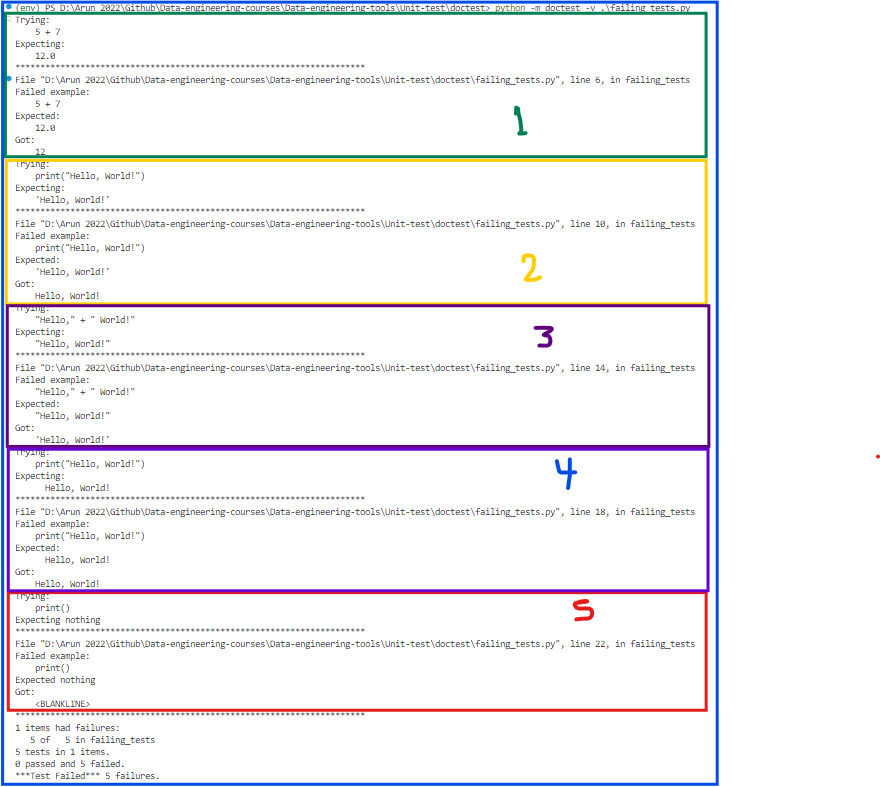 



- In this first piece of output, the expected result is a floating-point number. However, 5 + 7 returns an integer value of 12. Therefore, doctest flags the test as a failing one. The Expected: and Got: headings give you hints on the detected problem.
- In the second one, the expected output uses single quotes. However, the `print()` function issues its output without quotes, making the test fail.
- Third output shows another failing test. In this example, the problem is that Python uses single quotes rather than double quotes when displaying strings in an interactive section. Again, this tiny difference makes your test fail.
- In the fourth test, tests fails because the expected output contains leading whitespaces. However, the actual output doesn’t have leading spaces.
- In a regular REPL session, calling `print()` without arguments displays a blank line. In a doctest test, a blank line means that the code you just executed doesn’t issue any output. That’s why the output of doctest says that nothing was expected, but `BLANKLINE` was obtained. You’ll learn more about this `BLANKLINE` placeholder tag in the section about the limitations of doctest.

#### 8. Writing doctest Tests for Catching Exceptions

Besides testing for successful return values, you’ll often need to test code that’s expected to raise exceptions in response to errors or other issues.

The doctest module follows mostly the same rules when catching return values and exceptions. It searches for text that looks like a Python exception report or traceback and checks it against any exception that your code raises.

For example, say that you’ve added the following `divide()` function to your `calculations.py` file: 

```python 
def divide(a, b):
    return float(a / b)
``` 
It gave following output: 

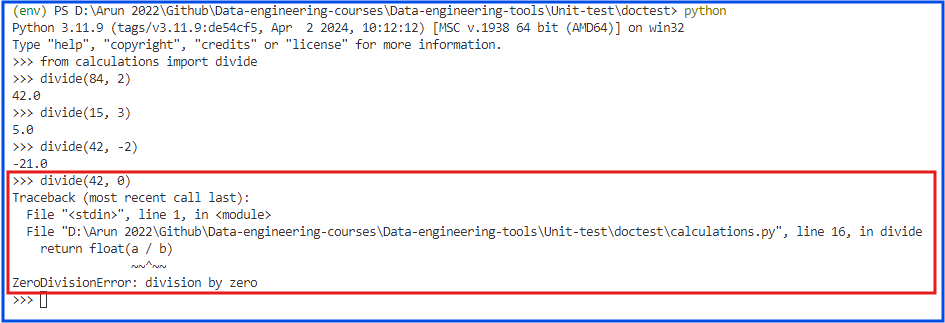

- The first three examples show that `divide()` works well when the divisor, b, is different from 0. 
- However, when b is 0, the function breaks with a `ZeroDivisionError`. This exception signals that the operation isn’t allowed.
- How can we test for this exception using a doctest test? Check out the docstring in the below code, especially the last test case:
  
  ```python 
  # calculations.py 
  # calculations.py
    # ...

    def divide(a, b):
        """Compute and return the quotient of two numbers.

        Usage examples:
        >>> divide(84, 2)
        42.0
        >>> divide(15, 3)
        5.0
        >>> divide(42, -2)
        -21.0

        >>> divide(42, 0)
        Traceback (most recent call last):
        ZeroDivisionError: division by zero
        """
        return float(a / b)
    ```

    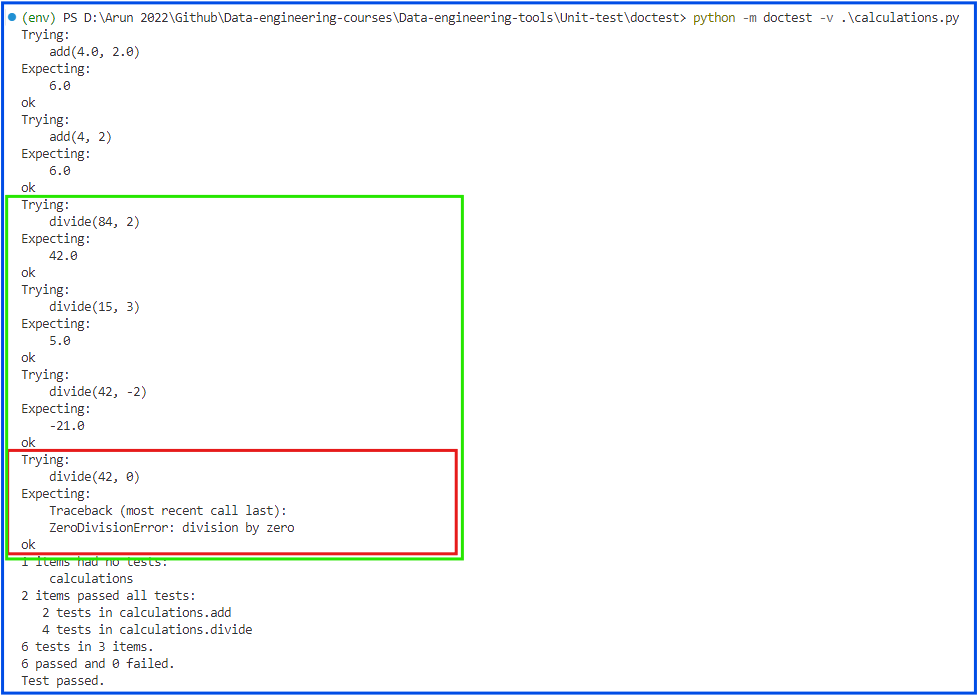 
    
    The traceback body shows information about the file and line that caused the exception. It also shows the entire stack trace down to the failing code line. Sometimes, this information can be useful when documenting your code.

#### 9. Building More Elaborate doctest Tests

- Often, we need to test functionality that depends on other objects in our code. For example, we may need to test the methods of a given class. To do this, we need to instantiate the class first.
- The doctest module is able to run code that creates and imports objects, calls functions, assigns variables, evaluates expressions, and more. We can take advantage of this capability to perform all kinds of preparation steps before running the actual test cases.
- For example, say we are writing a queue data structure and decide to use the deque data type from the [collections module](https://docs.python.org/3/library/collections.html#module-collections) to implement it efficiently. After a few minutes of coding, we end up with the following code:
  
  ```python 
    # queue.py

    from collections import deque

    class Queue:
        def __init__(self):
            self._elements = deque()

        def enqueue(self, element):
            self._elements.append(element)

        def dequeue(self):
            return self._elements.popleft()

        def __repr__(self):
            return f"{type(self).__name__}({list(self._elements)})"
    ```
- Our Queue class only implements two basic queue operations, `enqueue` and `dequeue`. Enqueue allows us to add items or elements to the end of the queue, while dequeue lets remove and return items from the beginning of the queue.
- Queue also implements a `.__repr__()` method that provides the class’s string representation. This method will play an important role in writing and running our doctest tests.
- Now say that we want to write doctest tests to guarantee that the `.enqueue()` and `.dequeue()` methods work fine. To do this, we first need to create an instance of Queue and populate it with some sample data:

    ```python 
    # queue.py

    from collections import deque

    class Queue:
        def __init__(self):
            self._elements = deque()

        def enqueue(self, element):
            """Add items to the right end of the queue.

            >>> numbers = Queue()
            >>> numbers
            Queue([])

            >>> for number in range(1, 4):
            ...     numbers.enqueue(number)

            >>> numbers
            Queue([1, 2, 3])
            """
            self._elements.append(element)

        def dequeue(self):
            """Remove and return an item from the left end of the queue.

            >>> numbers = Queue()
            >>> for number in range(1, 4):
            ...     numbers.enqueue(number)
            >>> numbers
            Queue([1, 2, 3])

            >>> numbers.dequeue()
            1
            >>> numbers.dequeue()
            2
            >>> numbers.dequeue()
            3
            >>> numbers
            Queue([])
            """
            return self._elements.popleft()

        def __repr__(self):
            return f"{type(self).__name__}({list(self._elements)})"
        ```
- Inside the docstring of `enqueue()`, we first run some setup steps. `numbers = Queue()` creates an instance of Queue, while next two lines check that the instance has been successfully created and is currently empty. Notice how we’ve used the custom string representation of Queue to express the output of this preparation step.
- The for loop that uses `.enqueue()` to populate the Queue instance with some sample data. In this case, `.enqueue()` doesn’t return anything, so we don’t have to check any return value. 
- Finally, lines where `numbers` and `Queue([1, 2, 3])` run the actual test by confirming that the Queue instance now contains the sample data in the expected order.
- In `.dequeue()`, part, it creates a new instance of Queue, populate it with some sample data, and check that the data was successfully added. Again, these are setup steps that you need to run before testing the `.dequeue()` method itself.

The real tests appear on lines `numbers.dequeue()`, `numbers.dequeue()`, `numbers.dequeue()`, `numbers` and `Queue([])`. In those lines, we call `.dequeue()` three times. Each call has its own output line. Finally, lines with `numbers` and `Queue([])` verify that instance of Queue is completely empty as a result of calling `.dequeue()`.

An important point to highlight in the above example is that doctest runs individual docstrings in a dedicated context or scope. Therefore, names declared in one docstring can’t be used in another docstring. So, the numbers object defined in `.enqueue()` isn’t accessible in .dequeue(). You need to create a new Queue instance in .dequeue() before you can test this latter method.

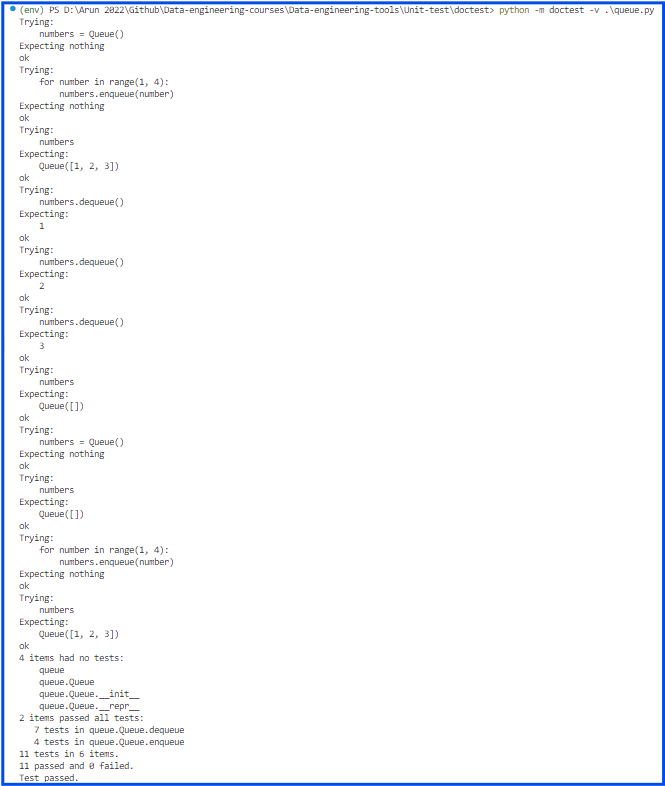

#### 10. Dealing With Whitespaces and Other Characters

Regarding characters such as whitespaces and backslashes, the rules are a bit complex. Expected outputs can’t consist of blank lines or lines containing only whitespace characters. Such lines are interpreted as the end of the expected output.

If your expected output includes blank lines, then you must use the <code>\<BLANKLINE\></code> placeholder tag to replace them in `greet.py` python file.

```python 
# greet.py

def greet(name="World"):
    """Print a greeting.

    Usage examples:
    >>> greet("Pythonista")
    Hello, Pythonista!
    <BLANKLINE>
    How have you been?
    """
    print(f"Hello, {name}!")
    print()
    print("How have you been?")
```

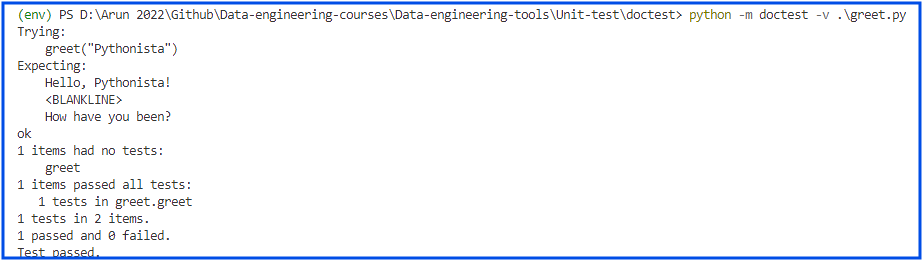

The expected output of `greet()` contains a blank line. To make your doctest test pass, you must use the <code>\<BLANKLINE\></code> tag on every expected blank line, just like you did in the highlighted line above.

Tab characters are also complex to match when they appear in test outputs. Tabs in the expected output are automatically converted into spaces. In contrast, tabs in the actual output aren’t modified.

This behavior will make your tests fail because the expected and actual output won’t match. If your code’s output includes tabs, then you can make the doctest tests pass with the NORMALIZE_WHITESPACE option or directive. For an example of how to deal with tabs in your outputs, check out the Embedding Directives in Your doctest Tests section.

Backslashes also require special attention in your doctest tests. Tests that use backslashes for explicit line joining or other reasons must use a raw string, also known as an r-string, which will preserve your backslashes exactly as you type them:

```python 
# greet.py

def greet(name="World"):
    r"""Print a greeting.

    Usage examples:
    >>> greet("Pythonista")
    /== Hello, Pythonista! ==\
    \== How have you been? ==/
    """
    print(f"/== Hello, {name}! ==\\")
    print("\\== How have you been? ==/")

```
In this example, you use a raw string to write the docstring of this new version of greet(). Note the leading r in the docstring. Note that in the actual code, you double the backslash (\\) to escape it, but in the docstring you don’t need to double it.

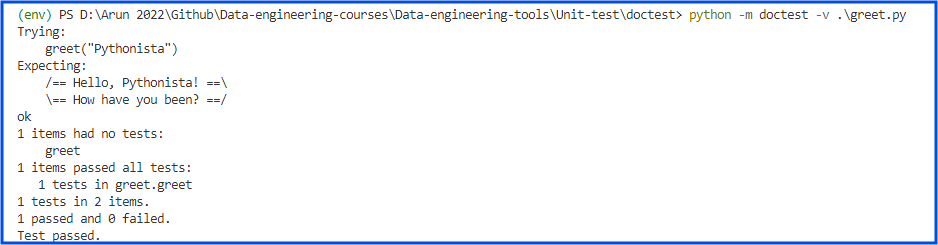

If you don’t want to use a raw string as a way to escape backslashes, then you can use regular strings that escape the backslash by doubling it. Following this advice, you can also write the above test case like in the example below:

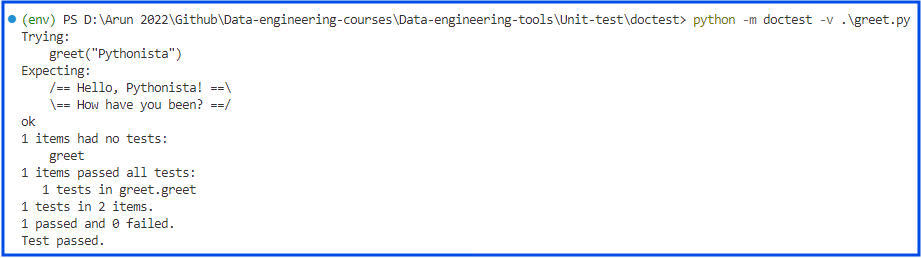

In this new version of the test cases, you double the backslash characters to escape them in the expected output of your doctest tests.

# Reference

- https://realpython.com/python-doctest/ 
- https://docs.python.org/3/library/collections.html#module-collections 